<div style="display: flex; align-items: center; gap: 2px;">
  
  <div style="text-align: left; padding: 0;">
   <h2 style="font-size: 1.8em; margin-bottom: 0;"><b>Non Linearity in Regression...</b></h2>
   <br>
   <h3 style=" font-size: 1.2em;margin-bottom: 0;">Alternatives to Linear Regression</h3>
   <h3 style="font-size: 1.2em; margin-bottom: 0; color: blue;"><i>Dr. Satadisha Saha Bhowmick</i></h3>
  </div>

  <div style="margin-right: 5px; padding: 0;">
    <img src="images/intro-pic.png" align="right" alt="intro-pic" style="width: 70%;">
    <!-- TEXT NEXT TO IMAGE -->
      <div style="font-size: 0.5em;">
        <p>Woman teaching geometry, from a fourteenth-century edition of Euclid’s geometry book.</p>
      </div>
  </div>

</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from ipywidgets import interact
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

bac_data = pd.read_csv("BLOODALC.csv")

### Week 2: Learning Outcomes
Moving beyond Linear Regression

<div style="display: flex; gap: 2px;">

  <div style="flex: 1;">
  <ul>
    <li class="fragment">Adjust for nonlinearity in regression using squared and polynomial terms.</li>
    <li class="fragment">Adjust for nonconstant variance or outlying values using weighted least squares.</li>
  </ul>

  
  </div>

  <div style="flex: 1;">
  <ul>
    <li class="fragment">Use regularization methods like ridge or LASSO for large $p$, small $n$ problems.</li>
    <li class="fragment">Variable Selection using Ridge or LASSO.</li>
    <li class="fragment">Use smoothers (splines in particular) to detect patterns in data.</li>
  </ul>
  </div>

</div>

### Non Linearity
Often the relationship between the response variable $Y$ and the independent variable $X$ is non-linear.

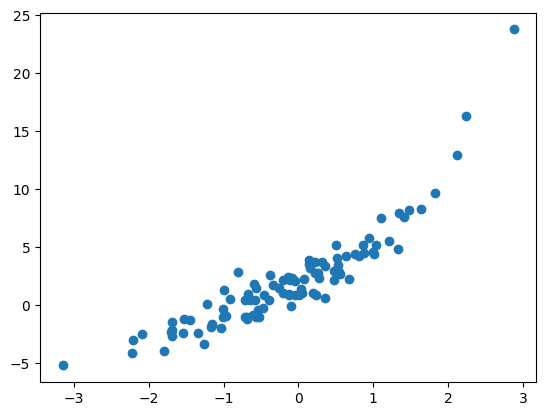

In [2]:
np.random.seed(12)
X = np.random.normal(0,1,size=(100,1))
Y = 2*X + np.exp(X) + np.random.normal(1,1,size=(100,1))

plt.scatter(X,Y)

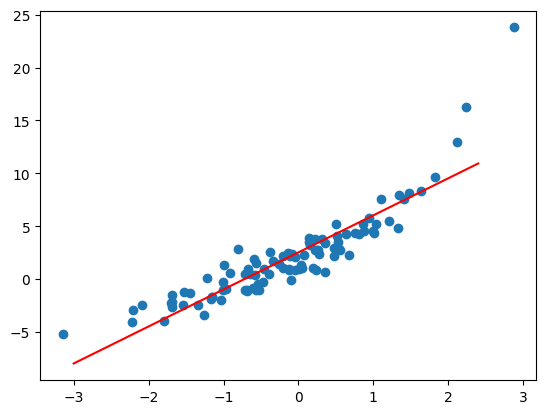

In [3]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,Y)

plt.scatter(X,Y)
plt.plot(np.arange(-3,2.5,0.1),reg.predict(np.arange(-3,2.5,0.1).reshape(-1,1)),color="red")

### Squared and Polynomial Terms

<div style="display: flex; align-items: center; gap: 5px;">

  <div class="fragment"; style="flex: 1;">
    <p>What happens if you see a curved pattern in your residuals?</p>
    <p>We can use squared terms (or even higher order!) in linear regression by simply adding a squared term to the design matrix.</p>
    <p>
    $$\begin{aligned}
        \begin{bmatrix}
        1 & x_{11} & x^2_{11}\\
        1 & x_{21} & x^2_{21}\\
        \vdots & \vdots & \vdots\\
        1 & x_{n1} & x^2_{n1}
        \end{bmatrix} \begin{bmatrix}
        \beta_0\\
        \beta_1\\
        \beta_2
        \end{bmatrix} &= \begin{bmatrix}
        y_1\\
        y_2\\
        \vdots\\
        y_n
        \end{bmatrix}
    \end{aligned}$$
    </p>
    <p>Because the squared terms are captured in the design matrix, we can still consider this to be “linear in the parameters”.</p>
  </div>

  <div class="fragment"; style="flex: 1;">
    <img src="images/curved-residuals.png" alt="Confidence Band" scale="0.65;" style="width: 90%;">
  </div>
</div>

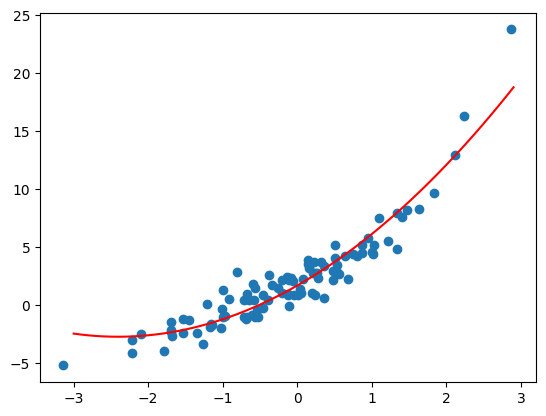

In [4]:
D_matrix = np.hstack([X,X**2])
quad_reg = LinearRegression()
quad_reg.fit(D_matrix,Y)

ax = np.arange(-3,3,0.1).reshape(-1,1)
plt.scatter(X,Y)
plt.plot(ax,quad_reg.predict(np.hstack([ax,ax**2])),color="red")

We can add these higher order features using the PolynomialFeatures tool in the ``sklearn.preprocessing`` module.

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_X = poly.fit_transform(X)
poly_X[0:5]

array([[ 1.        ,  0.47298583,  0.2237156 ],
       [ 1.        , -0.68142588,  0.46434123],
       [ 1.        ,  0.2424395 ,  0.05877691],
       [ 1.        , -1.70073563,  2.8925017 ],
       [ 1.        ,  0.75314283,  0.56722413]])

Adding higher and higher degree terms fits the data better, but at a certain point starts capturing the true relationship worse.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10)
poly_X = poly.fit_transform(X)


poly_reg = LinearRegression()
poly_reg.fit(poly_X,Y)

ax = np.arange(-3.2,3.2,0.1).reshape(-1,1)
plt.scatter(X,Y)
plt.plot(ax,poly_reg.predict(poly.transform(ax)),color="brown")

<img src="images/poly-overfit.png" alt="Confidence and Prediction Intervals" scale="0.5;" style="width: 70%;">

### Some Practical Notes

- To implement, just add a new column to your dataframe.
- To avoid multicollinearity, center your feature terms.
- You can also add higher order terms, $x^3$, $x^4$, etc.
- If you have a higher order term, it is good practice to include all lower order terms leading up to it.
    - A model with $x^2$ must include $x$.
    - A model with $x^3$ must include $x^2$ and $x$.

### Interaction Terms

You can also construct an interaction term.
- An interaction term is appropriate when a dependent variable (outcome) changes, depending on the variation of one or more other predictors simultaneously.
- In a regression equation, an interaction effect is represented as the product of two or more predictors.
$$
y_i = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_{12}x_1x_2
$$
- We can use interactions terms in linear regression by simply adding the term to the design matrix.

$$\begin{aligned}
\begin{bmatrix}
1 & x_{11} & x_{12} & x_{11}x_{12}\\
1 & x_{21} & x_{22} & x_{21}x_{22}\\
\vdots & \vdots & \vdots & \vdots\\
1 & x_{n1} & x_{n2} & x_{n1}x_{n2}
\end{bmatrix} \begin{bmatrix}
\beta_0\\
\beta_1\\
\beta_2\\
\beta_{12}
\end{bmatrix} &= \begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{bmatrix}
\end{aligned}$$

### Interaction Terms

Consider these graphs of the BAC dataset. In each graph, the red line represents females and the blue line represents males.
<img src="images/interaction-terms.png" alt="Confidence and Prediction Intervals" scale="0.5;" style="width: 70%;">

- The slopes in the graph of BAC vs. Beers are fairly close.
- The slopes in the graph of Weight vs. Beers are totally different–the slope for females appears negative, and the slope for males appears positive!
    - This is indicative of the need for an interaction term between gender and weight.

Resulting equation:
$
y = \beta_0+ \beta_\text{beers}x_\text{beers}+ \beta_\text{weight}x_\text{weight}+ \beta_\text{sex}x_\text{sex} + \beta_\text{weightXsex}x_\text{weight}x_\text{sex}
$

### Some Practical Notes

- To implement, just add a new column to your dataframe.
- Be especially careful of multicollinearity, since you are directly calculating one predictor using others.
- If you do have a higher order term, it’s good practice to include all of the terms below it.
    - A model with $x_1x_2$, must include terms $x_1$ and $x_2$.
    -  A model with $x_1x_2x_3$, must include terms $x_1x_2$, $x_2x_3$, $x_1x_3$ as well as $x_1$, $x_2$ and $x_3$.

In [7]:
full_bac_df = pd.read_csv("BLOODALC.csv")
bac_df = pd.get_dummies(full_bac_df[["Gender_OSU","Beers","Weight_OSU","BAC"]],drop_first = True)
bac_df.head(5)

,Beers,Weight_OSU,BAC,Gender_OSU_male
0,5,132,0.10,False
1,2,128,0.03,False
2,9,110,0.19,False
3,8,192,0.12,True
4,3,172,0.04,True


By only including the interaction terms, you can in fact reproduce the coefficients for doing two separate regressions if we filter by gender!

In [ ]:
poly_int = PolynomialFeatures(degree = 2,interaction_only=True)
poly_int.fit_transform(bac_df[["Beers","Gender_OSU_male"]])

### How far can we go with this?

We can use similar techniques to estimate $y$ as a function of $X_1,..,X_k$ as long as we expect $y$ is of the form
$$y = \left(\sum_{i=1}^M \beta_i f_{i}(X_1,..,X_k)\right) + \epsilon$$

Here again $\epsilon$ is the distribution of residuals.

We simply find the least squares solution to

$$ \begin{bmatrix} f_{1}(X_{1,1},\ldots,X_{1,k}) & f_{2}(X_{1,1},\ldots,X_{1,k}) & \ldots & f_{M}(X_{1,1},..,X_{1,k}) \\
 f_{1}(X_{2,1},\ldots,X_{2,k}) & f_{2}(X_{2,1},\ldots,X_{2,k}) & \ldots & f_{M}(X_{2,1},..,X_{2,k}) \\
 \vdots & \vdots & \ddots & \vdots \\
  f_{1}(X_{n,1},\ldots,X_{n,k}) & f_{2}(X_{n,1},\ldots,X_{n,k}) & \ldots & f_{M}(X_{n,1},..,X_{n,k}) \end{bmatrix} \vec{\beta} = \vec{y} $$

Though as we see it's quite powerful, this ultimately is the limit of linear regression.

It is quite general, but doesn't allow us to fit everything. For instance, we can't use least squares linear regression to fit a relationship of the form
$$y = \beta_0 \sin(\beta_1 x) + \epsilon$$

because $\beta_1$ is inside the function.

### The limits of polynomial regression.

For general purpose polynomials are pretty good, but they have their limits. 
Even if we have tons and tons of data, they just can't fit certain functions that well.

- Polynomials cannot fit threshold effects, e.g., a nearly flat curve that suddenly accelerates.
- Polynomials cannot fit logarithmic-looking relationships, i.e., ones that progressively flatten over a long interval.
- Polynomials can't have a very rapid turn.

In [ ]:
np.random.seed(0)

# True nonlinear function (Runge function)
def runge(x):
    return 1 / (1 + 25 * x**2)

# Generate data
xg = np.linspace(-1, 1, 600)
yg_true = runge(xg)

degrees = [1, 3, 5, 9]
plt.figure(figsize=(9, 5))
plt.plot(xg, yg_true, linewidth=2, label="true f(x)")

for d in degrees:
    # Construct polynomial design matrix
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X = poly.fit_transform(xg.reshape(-1, 1))
    Xg = poly.transform(xg.reshape(-1, 1))
    
    # Fit least squares regression
    model = LinearRegression()
    model.fit(X, yg_true)
    
    # Predict on data
    yg_hat = model.predict(Xg)
    
    # Plot the fit
    plt.plot(xg, yg_hat, label=f"deg {d}")

plt.title("Limits of polynomial regression: Runge phenomenon")
plt.xlim(-1.2, 1.2)
plt.legend()
plt.show()


<img src="images/runge-fit.png" alt="Confidence and Prediction Intervals" scale="0.5;" style="width: 70%;">

The solution to this ends up being what's known as splines. That is continuous piecewise polynomial functions.

### Assumptions of Linear Regression

We are assuming:
- A linear relationship.
- Independent observations.
- The distribution of the residuals is normal.
- The variance of the residuals is constant or equal over all values of $x_i \rightarrow$ $\color{blue}{\textbf{Homoskedasticity}}$.

#### What if the variance is not constant?

<img src="images/heteroskedasticity-II.png" alt="Confidence and Prediction Intervals" scale="0.5;" style="width: 70%;">

#### Unreliable Observations

Furthermore, what if we only have a few observations for one of the values of $𝑥$?

<img src="images/infrequent-observations.png" alt="Confidence and Prediction Intervals" scale="0.5;" style="width: 70%;">

### Weighted Linear Regression

Weighted linear regression is a reasonably minor modification to linear regression that can help account for:
- Unreliable Observations (outliers, influential points, noisy data)
- Non-constant variance (Heteroscedasticity)

The idea is some observations are more reliable than others and should therefore be weighed differently.

The purpose of this isn't to address non-linearity.

### Weighted Linear Regression

To do this we introduce a diagonal matrix of weights. Each weight $w_i \geq 0$ is a measure of "reliability" of the data point $P_i = (x_{i,1},...,x_{i,k},y_i)$

$$ W = \begin{bmatrix} w_1 & 0 & \ldots & 0\\
0 & w_2 & \ldots & 0\\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \ldots & w_n\end{bmatrix}.$$

Higher weights are more reliable. A weight of $0$ is equivalent running the regression without the data point.

### Weighted Linear Regression

To properly weight the observations, you need to weight both the predictors and the response.

Instead of finding the least squares solution to 
$$X \vec{\beta} = \vec{y}$$
we instead solve
$$WX \vec{\beta} = W\vec{y}$$

Then the Normal Equations become: $\vec{b} = (X^TWX)^{-1}X^TW\vec{y}$

### Example 

Given the data set 
$$(-2,3),(-1,5),(0,5),(1,4),(2,3)$$

suppose we know that the last two points $(1,4)$ and $(2,3)$ are unreliable. So we weight them less.


$$\begin{bmatrix} 1 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0.5 & 0\\
0 & 0 & 0 & 0 & 0.5 \end{bmatrix} \begin{bmatrix} 1 & -2\\
1 & -1 \\
1 & 0\\
1 & 1\\
1 & 2 \end{bmatrix} \vec{\beta} = \begin{bmatrix} 1 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0.5 & 0\\
0 & 0 & 0 & 0 & 0.5 \end{bmatrix} \begin{bmatrix} 3\\5\\5\\4\\3\end{bmatrix}$$

Note this really just effectively changes our loss function (the residual sum of squares). If $\hat{y}_i$ is the predicted $y$ value we get the weighted residual sum of squares

$$(3 - \hat{y_1})^2 + (5 - \hat{y_2})^2 + ( 0 - \hat{y}_3)^2 + (0.5(4-\hat{y}_4))^2 + (0.5(3-\hat{y}_5))^2$$

### Which weights to use?

Sometimes we might have knowledge about how the data was collected and assign weights manually. For instance, suppose we are taking readings, and a certain mechanical error on a sensor can double the measurement error. We can weighted those points less and still gain value from the data collected by the malfunctioning sensor.

Otherwise, we might weight an observation according to how "well-behaved" it is.
- Residuals (generally, $\frac{1}{\textrm{residual}}^2$)
- Leverage
- Cook's D

This technique also goes by the names of robust regression or iterated re-weighted least squares regression and is especially good for handling outliers.

### Iterated Weighted Least Squares Regression

Note two of these weighting schemes require residuals. Yet residuals require us to have a regression line!!
In these case we generally use <u style="color: blue; font-size: 1.0em; font-weight: bold;">Iterated Weighted Least Squares Regression</u>.

<b>IWLS Steps</b>:

1. Built a regression line using an unweighted regression.
2. Use the residuals from the previous step to get weights.
3. Run a regression using the weights found.
4. Repeat starting from step 2, until a suitable regression is found.